<a href="https://colab.research.google.com/github/Titas23/IS-170-Machine-Learning/blob/9.-Decision-Tree/HW_9_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

In [3]:
# load dataset
df = pd.read_csv("Employee Satisfaction Index.csv") 
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [4]:
df.columns

Index(['Unnamed: 0', 'emp_id', 'age', 'Dept', 'location', 'education',
       'recruitment_type', 'job_level', 'rating', 'onsite', 'awards',
       'certifications', 'salary', 'satisfied'],
      dtype='object')

In [5]:
# We will transform any columns where the information is in string value over to digits. 
le = LabelEncoder()

label = le.fit_transform(df['emp_id'])
label_1 = le.fit_transform(df['age'])
label_2 = le.fit_transform(df['Dept'])
label_3 = le.fit_transform(df['location'])
label_4 = le.fit_transform(df['education'])
label_5 = le.fit_transform(df['recruitment_type'])

df.drop('emp_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('Dept', axis=1, inplace=True)
df.drop('location', axis=1, inplace=True)
df.drop('education', axis=1, inplace=True)
df.drop('recruitment_type', axis=1, inplace=True)

df['emp_id']= label
df['age']= label_1
df['Dept']= label_2
df['location']= label_3
df['education']= label_4
df['recruitment_type']= label_5

In [6]:
#split dataset in features and target variable
x_data=df[['Dept','location','education','recruitment_type','job_level','rating','onsite','awards','certifications','emp_id','age','salary']]
y_data=df['satisfied']
# 'emp_id','age','salary'
x_data

,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,emp_id,age,salary
0,0,1,0,2,5,2,0,1,0,86,5,86750
1,4,1,0,3,3,5,1,2,1,408,27,42419
2,4,1,1,2,4,1,0,2,0,461,20,65715
3,3,0,0,0,2,3,1,0,0,361,21,29805
4,0,0,1,1,2,1,0,5,0,69,10,29805
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,0,2,5,0,6,0,46,26,29805
496,4,1,1,2,2,4,0,2,0,491,1,29805
497,1,0,0,0,1,3,0,2,0,170,11,24076
498,4,0,1,0,2,1,1,1,1,452,3,29805


In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1) # 70% training and 30% test
df.shape

(500, 14)

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


Given the data the results give us a 50% accuracy meaning that half of the employees are satisfied with their jobs. 

Visualizing 


In [12]:
!pip install graphviz
!pip install pydotplus
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


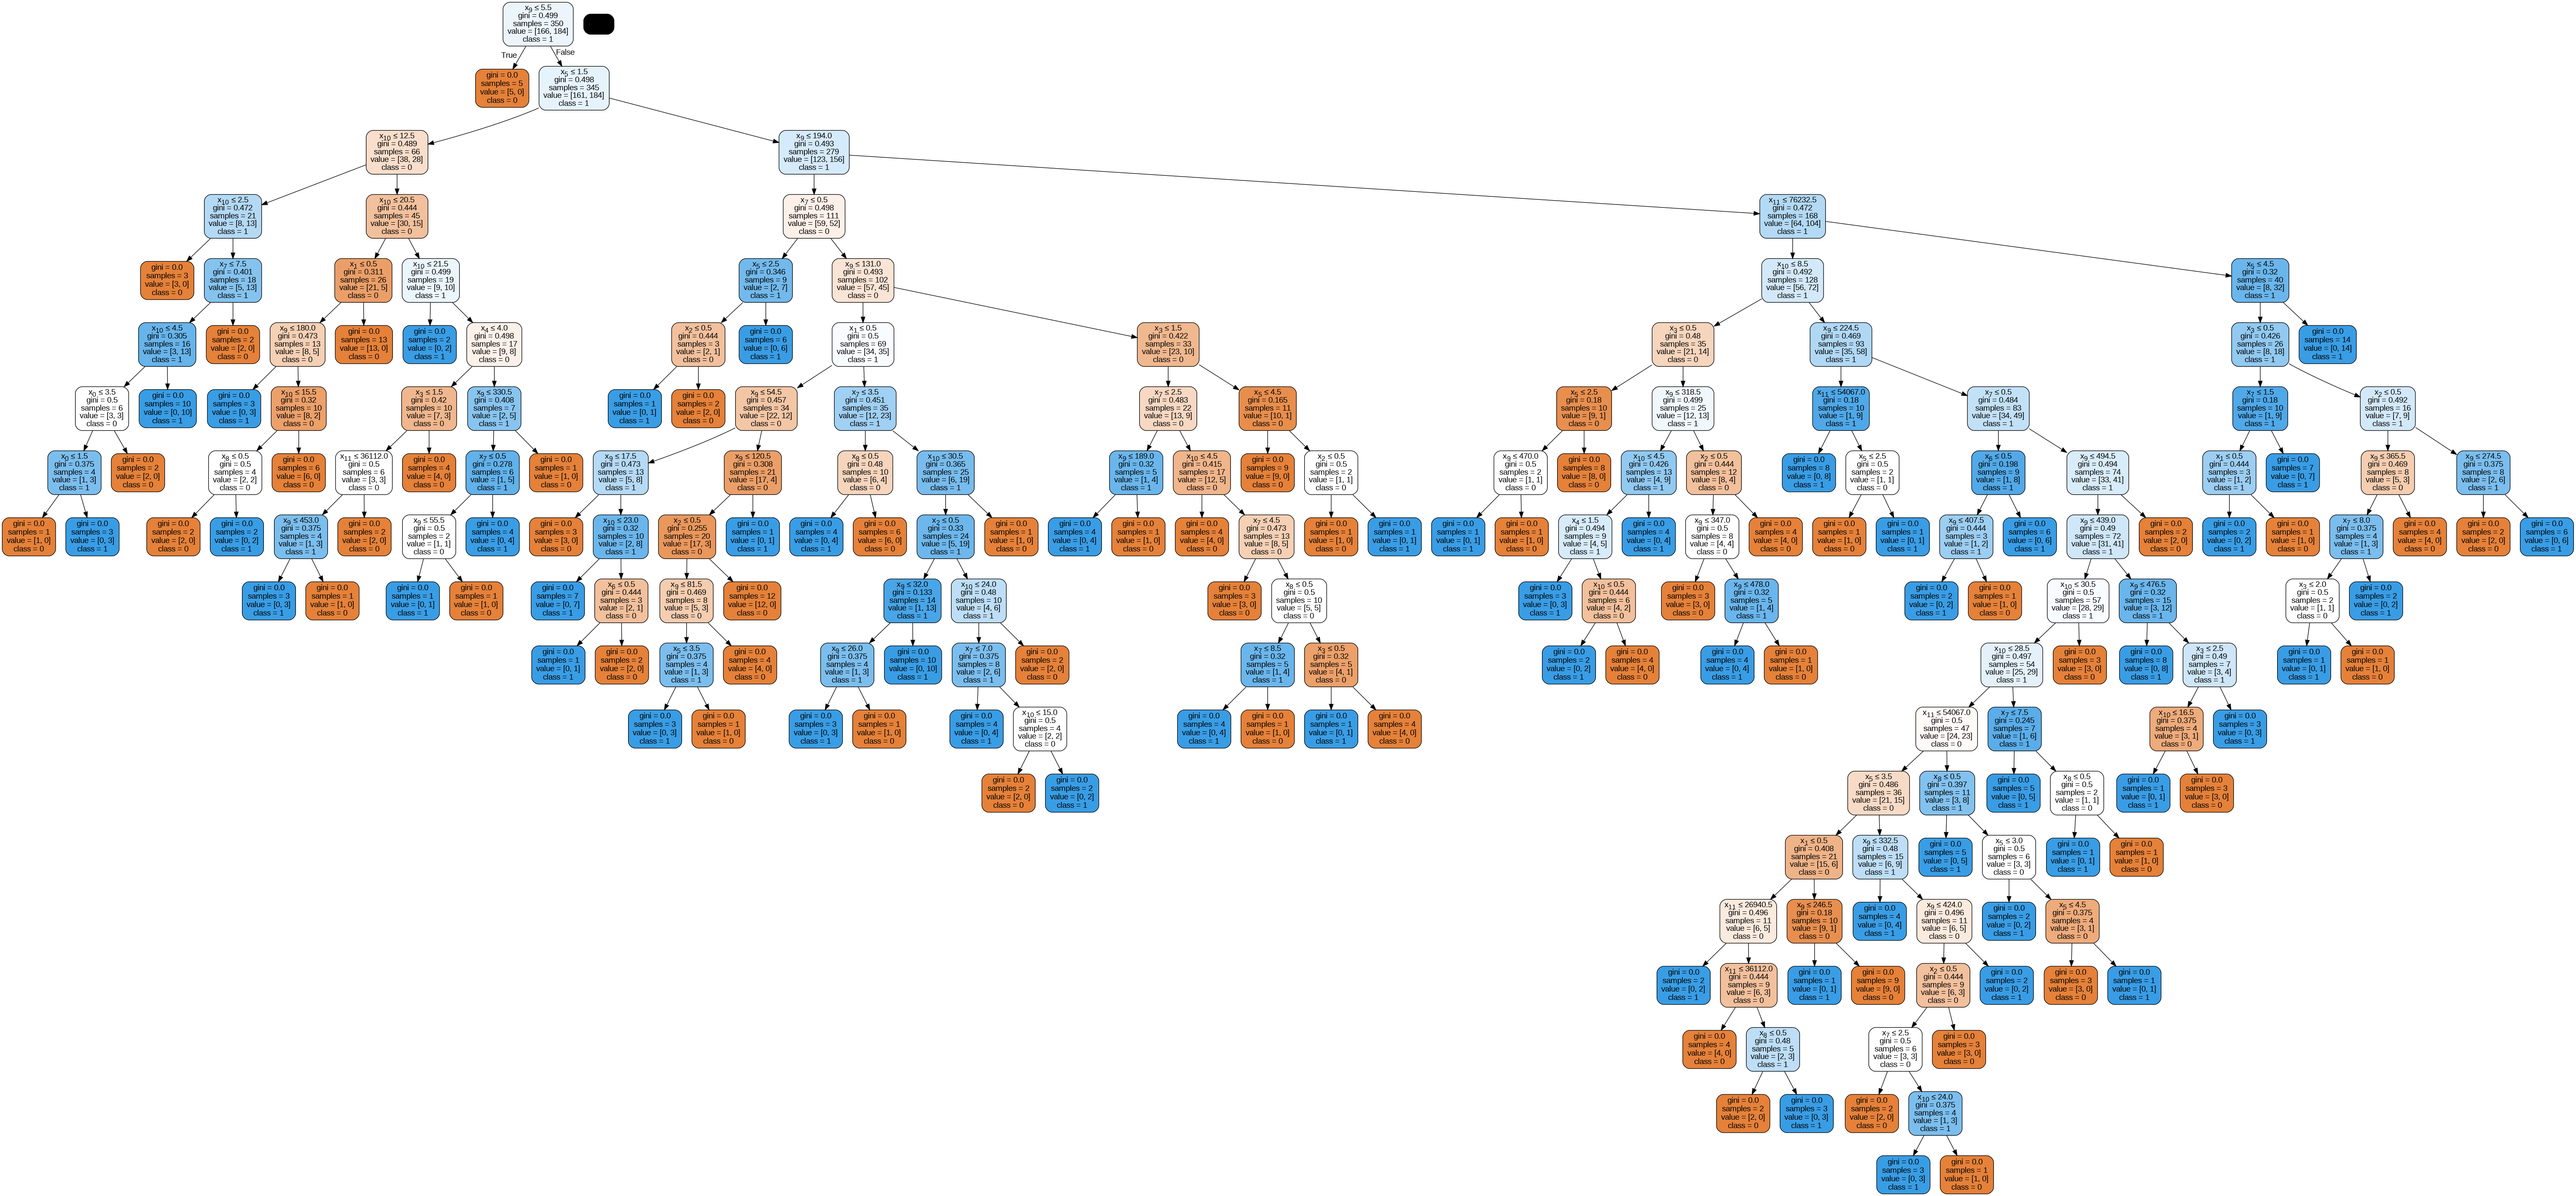

In [13]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Employee Satisfaction.png')
Image(graph.create_png())



```

```

# Building a Deep Learning Model just for practice. 

In [14]:
from keras.models import Sequential

model=Sequential()

In [15]:
#The first hidden layer will have 60 nodes and input dimensions are 12 
#because there are 12 columns in X_train data. For the first hidden layer, we have to
#indicate the input dimensions.

from keras.layers import Dense


#Adding the first hidden layer
# model.add(Dense(32,activation='relu',input_dim=12))
model.add(Dense(60, input_dim=(12), activation='relu'))

In [16]:
#Adding the second hidden layer
model.add(Dense(8,activation='relu'))

In [17]:
#Add the output layer
model.add(Dense(1,activation='sigmoid'))


In [18]:
#Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
#Train the model for 200 epochs
model.fit(X_train,y_train,epochs=200)


Epoch 1/200
11/11 [==============================] - 1s 3ms/step - loss: 2489.2146 - accuracy: 0.4743
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 706.5335 - accuracy: 0.5257
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 160.9576 - accuracy: 0.5143
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 127.1705 - accuracy: 0.5200
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 50.3738 - accuracy: 0.4886
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 37.8208 - accuracy: 0.5200
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 44.5774 - accuracy: 0.5171
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 21.3487 - accuracy: 0.5057
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 23.9050 - accuracy: 0.4629
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 56.1694 - accuracy: 0

In [20]:
scores=model.evaluate(X_train, y_train)
print("Training Accuracy:%.2f%%\n"%(scores[1]*100))

scores=model.evaluate(X_test,y_test)
print("Testing Accuracy:%.2f%%\n"%(scores[1]*100))


11/11 [==============================] - 0s 2ms/step - loss: 6.7965 - accuracy: 0.5400
Training Accuracy:54.00%

5/5 [==============================] - 0s 3ms/step - loss: 7.8001 - accuracy: 0.5200
Testing Accuracy:52.00%

